In [143]:
# Added comment for git testing
#Natural Language Processing with the DIJA and Reddit Headlines
#Classification Predictions on Stock Market from Headlines
#Classification includes Overall Up or Down, Market Volitality, and Measure of Strong and Poor Days 

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns 

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#cross validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

#accuracy
from sklearn.metrics import accuracy_score

#train a perceptron model 
from sklearn.linear_model import Perceptron

#plot decision regions to visualize
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from wordcloud import WordCloud,STOPWORDS
import re
import nltk
from nltk.corpus import stopwords

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


In [436]:
#Import Data for Viz
df = pd.read_csv('Combined_News_DJIA.csv')
CATdf = pd.read_csv('Corrected_Combined_DJIA_cat.csv')
corrCATdf = pd.read_csv('corrCATdf.csv')

#Import Data for Modeling
data = pd.read_csv('Combined_News_DJIA.csv')
dataCAT = pd.read_csv('Corrected_Combined_DJIA_cat.csv')
DJIAdf = pd.read_csv('DJIA_table.csv')
corrCATdf = pd.read_csv('corrCATdf.csv')


In [145]:
CATdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 36 columns):
Date            1989 non-null object
NetUpDown       1989 non-null int64
Open            1989 non-null float64
High            1989 non-null float64
Low             1989 non-null float64
Close           1989 non-null float64
Volume          1989 non-null int64
HLdifference    1989 non-null float64
HLcat           1989 non-null int64
OCdifference    1989 non-null float64
OCcat           1989 non-null int64
Top1            1989 non-null object
Top2            1989 non-null object
Top3            1989 non-null object
Top4            1989 non-null object
Top5            1989 non-null object
Top6            1989 non-null object
Top7            1989 non-null object
Top8            1989 non-null object
Top9            1989 non-null object
Top10           1989 non-null object
Top11           1989 non-null object
Top12           1989 non-null object
Top13           1989 non-null object
Top

In [4]:
#Define features and Dependent Variable
CATdf_features = CATdf.iloc[:,2:35]
depVar = CATdf['NetUpDown']

In [5]:
#Define X, Y using features and dependent variable
X = CATdf_features
y = depVar

In [6]:
#Number of unique y values 
print('Class labels:', np.unique(y))

Class labels: [0 1]


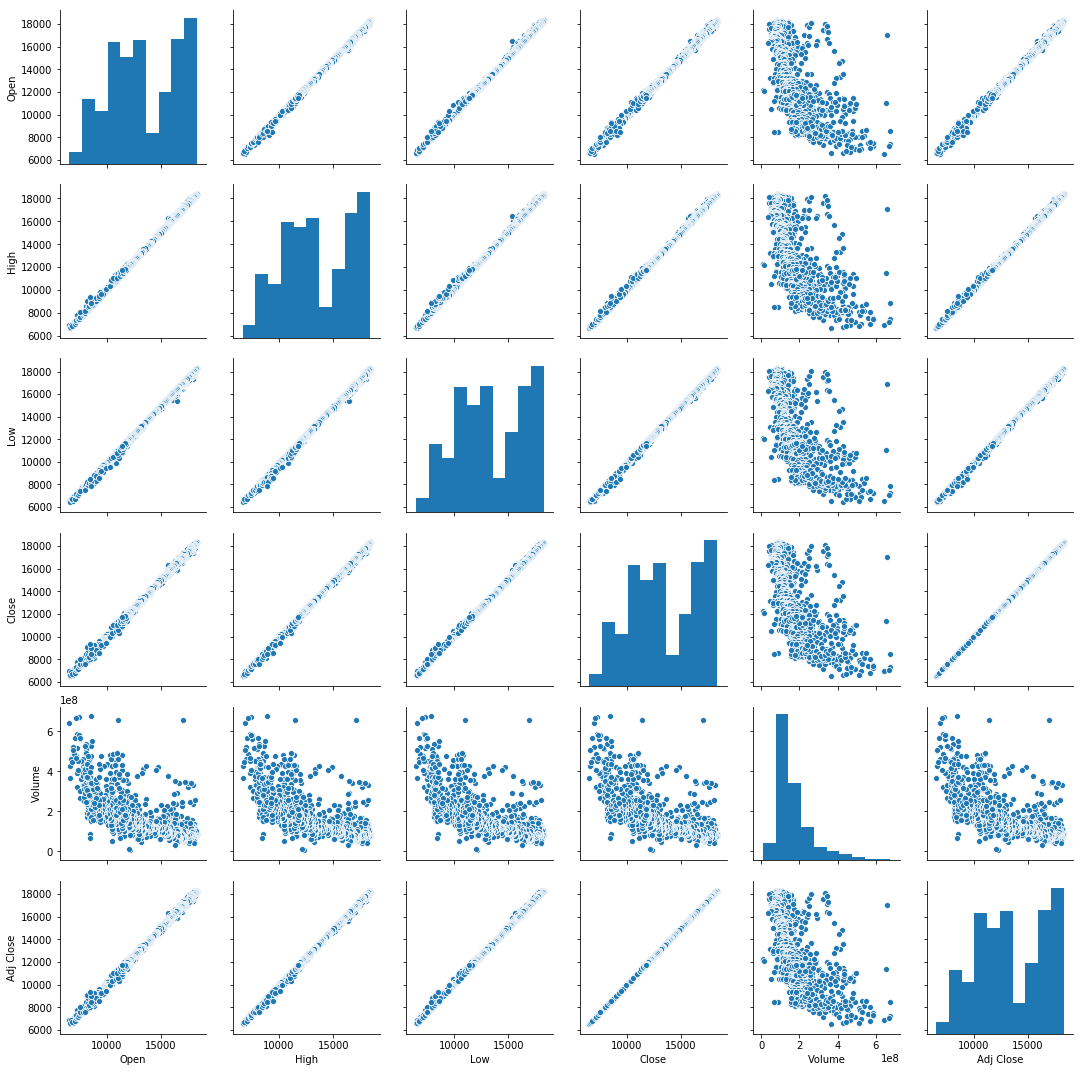

In [7]:
# Create a default pairplot
sns.pairplot(DJIAdf)

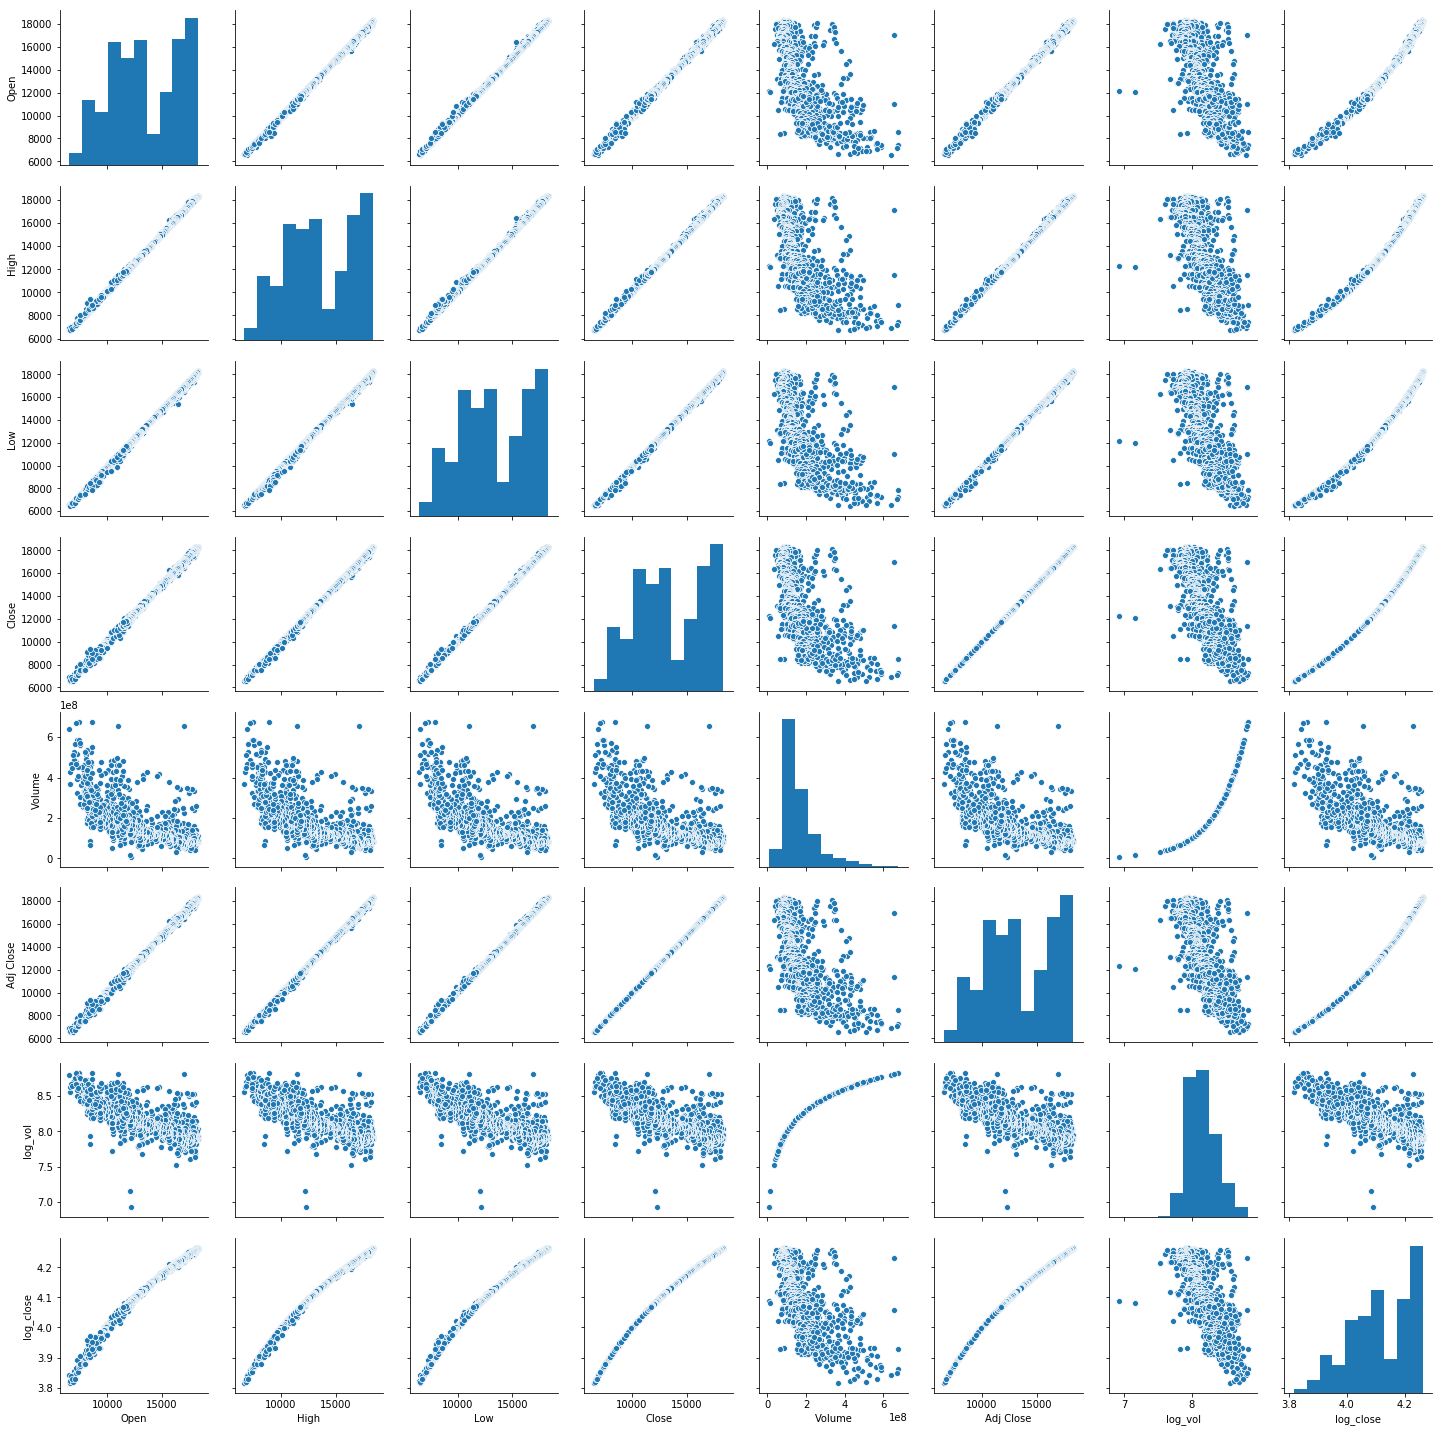

In [8]:
# Take the log of Volume and Close 
DJIAdf['log_vol'] = np.log10(DJIAdf['Volume'])
DJIAdf['log_close'] = np.log10(DJIAdf['Close'])
sns.pairplot(DJIAdf)

# Drop the non-transformed columns
DJIAdf = DJIAdf.drop(columns = ['Volume'])
DJIAdf = DJIAdf.drop(columns = ['Adj Close'])
DJIAdf = DJIAdf.drop(columns = ['Close'])
DJIAdf = DJIAdf.drop(columns = ['Open'])
DJIAdf = DJIAdf.drop(columns = ['High'])
DJIAdf = DJIAdf.drop(columns = ['Low'])

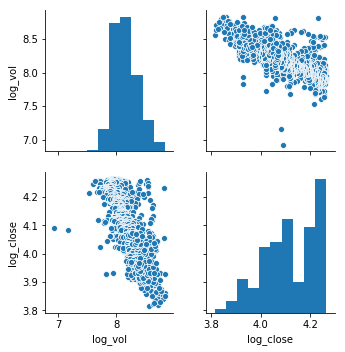

In [9]:
# Create a pairplot with Volume/Close
sns.pairplot(DJIAdf)

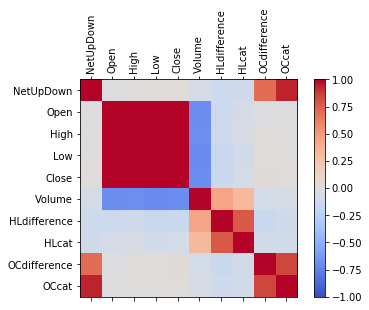

In [10]:
#Correlation heat map
#Visulaize highly correlated features (quantitative realtion between two features)

corrCATdf_table = CATdf.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corrCATdf_table, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corrCATdf_table.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corrCATdf_table.columns)
ax.set_yticklabels(corrCATdf_table.columns)
plt.show()

In [11]:
#Correlation Table
#View numeric values of correlation 
print(corrCATdf_table)

              NetUpDown      Open      High       Low     Close    Volume  \
NetUpDown      1.000000 -0.012815  0.002276  0.006163  0.018649 -0.054973   
Open          -0.012815  1.000000  0.999592  0.999436  0.998991 -0.691621   
High           0.002276  0.999592  1.000000  0.999373  0.999546 -0.686997   
Low            0.006163  0.999436  0.999373  1.000000  0.999595 -0.699572   
Close          0.018649  0.998991  0.999546  0.999595  1.000000 -0.694281   
Volume        -0.054973 -0.691621 -0.686997 -0.699572 -0.694281  1.000000   
HLdifference  -0.109418 -0.121646 -0.108470 -0.143605 -0.127412  0.439628   
HLcat         -0.099950 -0.064063 -0.052837 -0.080259 -0.067757  0.320619   
OCdifference   0.700381 -0.017328  0.004102  0.008678  0.027595 -0.062772   
OCcat          0.942900 -0.015286  0.002966  0.006804  0.022340 -0.058384   

              HLdifference     HLcat  OCdifference     OCcat  
NetUpDown        -0.109418 -0.099950      0.700381  0.942900  
Open             -0.121646

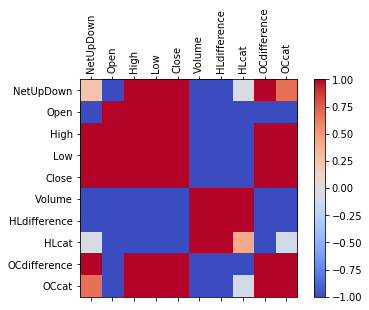

In [13]:
#Covariance Heat Map 
#visualize coavriance (measure of how two features change together)

covCATdf_table = CATdf.cov()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(covCATdf_table,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(covCATdf_table.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(covCATdf_table.columns)
ax.set_yticklabels(covCATdf_table.columns)
plt.show()

In [14]:
#Covariance Table
#View numeric values of Covariance 
covCATdf_table = CATdf.cov()
print(covCATdf_table)

                 NetUpDown          Open          High           Low  \
NetUpDown     2.484045e-01 -2.007655e+01  3.557539e+00  9.677717e+00   
Open         -2.007655e+01  9.880219e+06  9.854163e+06  9.897074e+06   
High          3.557539e+00  9.854163e+06  9.836200e+06  9.874379e+06   
Low           9.677717e+00  9.897074e+06  9.874379e+06  9.925152e+06   
Close         2.922203e+01  9.872527e+06  9.855979e+06  9.900935e+06   
Volume       -2.573398e+06 -2.041858e+11 -2.023682e+11 -2.070022e+11   
HLdifference -6.120178e+00 -4.291166e+04 -3.817847e+04 -5.077326e+04   
HLcat        -3.190182e-02 -1.289565e+02 -1.061225e+02 -1.619267e+02   
OCdifference  4.929858e+01 -7.692386e+03  1.816760e+03  3.861286e+03   
OCcat         6.809378e-01 -6.962019e+01  1.347909e+01  3.106164e+01   

                     Close        Volume  HLdifference         HLcat  \
NetUpDown     2.922203e+01 -2.573398e+06 -6.120178e+00 -3.190182e-02   
Open          9.872527e+06 -2.041858e+11 -4.291166e+04 -1.28956

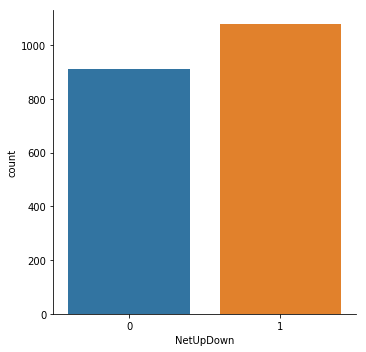

In [16]:
#Factor Plot of NetUpDown
sns.catplot('NetUpDown', data = CATdf, kind = 'count')

In [17]:
#Count Net totals
NetUpDown_totals = CATdf.groupby('NetUpDown')['NetUpDown'].count()
NetUpDown_totals
#More Positive Days than Negative days

NetUpDown
0     912
1    1077
Name: NetUpDown, dtype: int64

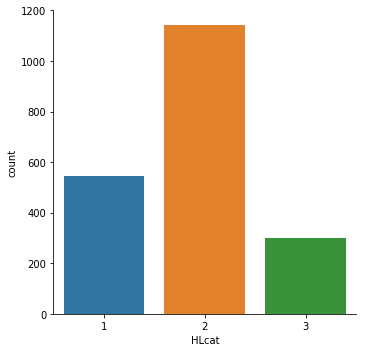

In [18]:
#Factor Plot of HLcat
sns.catplot('HLcat', data = CATdf, kind = 'count')

In [19]:
#Count Net totals
HLcat_totals = CATdf.groupby('HLcat')['HLcat'].count()
HLcat_totals
#1 = 0-100 in points swing
#2 = 100 - 250
#3 = 250+

HLcat
1     544
2    1144
3     301
Name: HLcat, dtype: int64

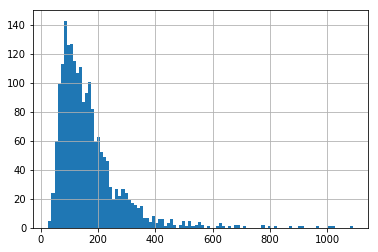

In [20]:
#Another way to plot histogram of HLdifference
CATdf['HLdifference'].hist(bins = 100)
#Shows numbers of days of HLdifference

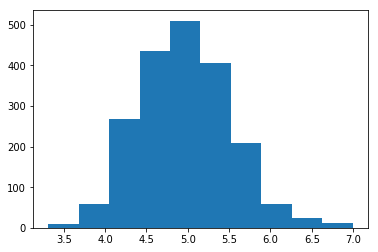

In [434]:
#Guassian curve manufactured for HLdifference 

# histogram plot of a low res sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
from numpy import exp
from scipy.stats import boxcox
# seed the random number generator
seed(1)

#define data
data2 = CATdf.HLdifference
#power transform
data1 = boxcox(data2, 0)

pyplot.hist(data1)
pyplot.show()

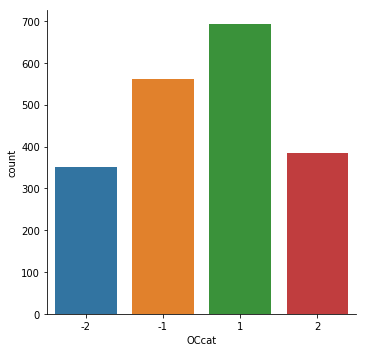

In [21]:
#Factor Plot of OCcat
sns.catplot('OCcat', data = CATdf, kind = 'count')

In [22]:
#Count totals of OCcat
OCcat_totals = CATdf.groupby('OCcat')['OCcat'].count()
OCcat_totals
#2 = >100 (very positive day)
#1 = >0 (positive day)
#-1 = >-100 (negative day)
#-2 = <-100 (very negative day)

OCcat
-2    350
-1    562
 1    692
 2    385
Name: OCcat, dtype: int64

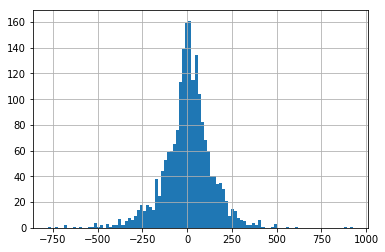

In [23]:
#Another way to plot histogram of OCdifference
CATdf['OCdifference'].hist(bins = 100)
#Shows numbers of days of OCdifference

Text(0.5, 1.0, 'Distribution of Trade Volume')

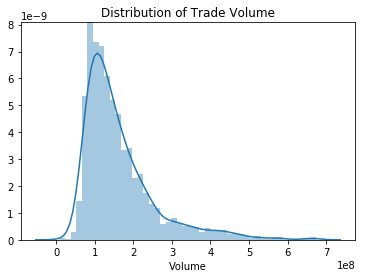

In [25]:
#Distribution of age, with an overlay of a density plot
volume = CATdf['Volume'].dropna()
volume_dist = sns.distplot(volume)
volume_dist.set_title("Distribution of Trade Volume")
#Bell curve of numbers of days with Volume

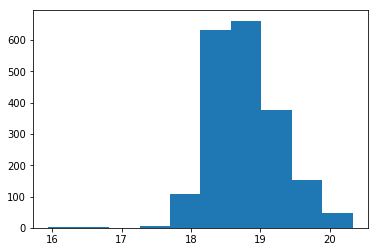

In [26]:
#Guassian curve manufactured for Volume 
# histogram plot of a low res sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
from numpy import exp
from scipy.stats import boxcox
# seed the random number generator
seed(1)

#define data
data2 = CATdf.Volume
#power transform
data1 = boxcox(data2, 0)

pyplot.hist(data1)
pyplot.show()

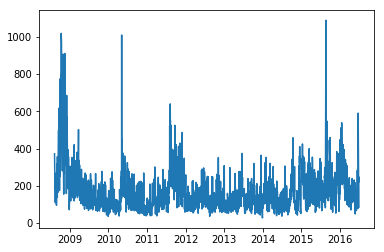

In [27]:
#Plot Trade HLDifference Over Time (volatility)
import datetime

X = pd.to_datetime(CATdf.Date)
y = CATdf.HLdifference

#plot
plt.plot(X,y)

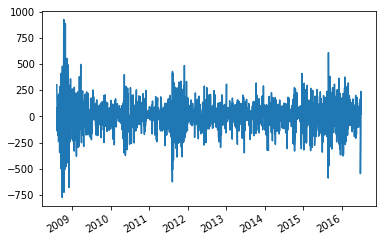

In [28]:
#Plot Trade OCdifference Over Time
import datetime

X = pd.to_datetime(CATdf.Date)
y = CATdf.OCdifference

#plot
plt.plot(X,y)
plt.gcf().autofmt_xdate()
plt.show()

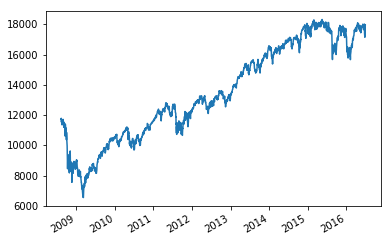

In [29]:
#Show Close over Time
import datetime

X = pd.to_datetime(CATdf.Date)
y = CATdf.Close

#plot
plt.plot(X,y)
plt.gcf().autofmt_xdate()
plt.show()

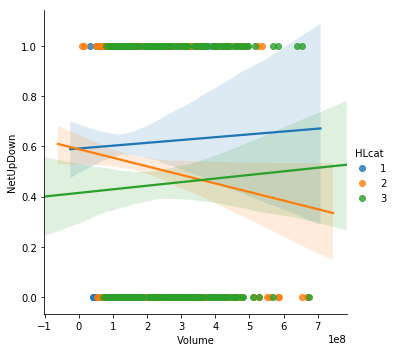

In [32]:
#Linear Plot of Volume and HLcat on Market Up/Down
#illustrates low volatilty days more liekly to finish net positive
#also higher volume on low and high volatility days more likely to finish net positive

sns.lmplot('Volume', 'NetUpDown', data=CATdf, hue = 'HLcat')

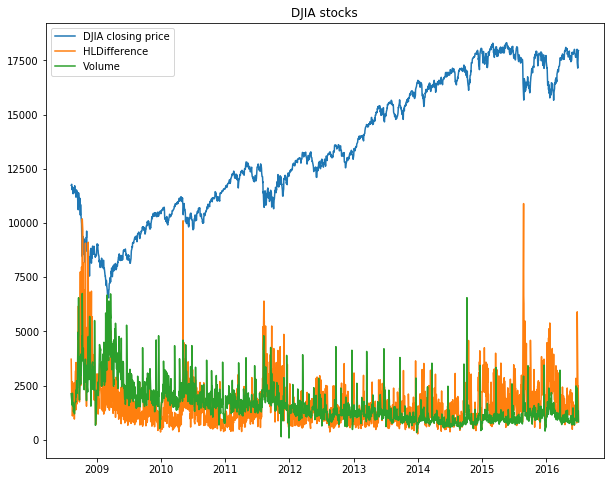

In [33]:
#Graph DJIA Close with HLdiffernce and Volume for insight

index = pd.read_csv('djia_df_cat.csv')

index.Date = pd.to_datetime(index.Date)
plt.figure(figsize=(10,8))
plt.plot(index.Date, index.Close,label = "DJIA closing price");
plt.plot(index.Date, index.HLdifference*10,label = "HLDifference"); #scale volume for readability
plt.plot(index.Date, index.Volume/100000, label = "Volume");
plt.legend();
plt.title("DJIA stocks");

In [34]:
#BEGIN MODELING

#split data set train/test
train = dataCAT[dataCAT['Date'] < '2015-01-01']
test = dataCAT[dataCAT['Date'] > '2014-12-31']

In [35]:
train.describe()

,NetUpDown,Open,High,Low,Close,Volume,HLdifference,HLcat,OCdifference,OCcat
count,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1.611000e+03,1611.000000,1611.000000,1611.000000,1611.000000
mean,0.547486,12518.307966,12597.623887,12437.175713,12523.124247,1.751160e+08,160.448173,1.821850,4.816281,0.112353
std,0.497895,2729.076752,2715.320414,2746.624716,2731.627854,9.872375e+07,111.062151,0.636309,136.498836,1.421368
min,0.000000,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,27.480468,1.000000,-774.169922,-2.000000
25%,0.000000,10454.044920,10519.379885,10393.205080,10457.724610,1.081350e+08,91.155274,1.000000,-50.964844,-1.000000
50%,1.000000,12339.709960,12407.410160,12272.580080,12350.610350,1.500000e+08,132.780273,2.000000,9.070313,1.000000
75%,1.000000,14928.340330,15014.770020,14851.574710,14934.325195,2.092050e+08,190.924317,2.000000,71.289550,1.000000
max,1.000000,18046.580080,18103.449220,18038.300780,18053.710940,6.749200e+08,1018.770507,3.000000,925.190430,2.000000


In [36]:
test.describe()

,NetUpDown,Open,High,Low,Close,Volume,HLdifference,HLcat,OCdifference,OCcat
count,378.000000,378.000000,378.000000,378.000000,378.000000,3.780000e+02,378.000000,378.000000,378.000000,378.000000
mean,0.515873,17468.750499,17563.174418,17361.034743,17468.830673,1.103683e+08,202.139674,2.116402,0.080174,0.050265
std,0.500410,625.971960,598.247772,656.966630,628.060502,3.861584e+07,111.026824,0.602555,159.965500,1.562190
min,0.000000,15676.259770,15897.820310,15370.330080,15660.179690,4.035000e+07,48.490234,1.000000,-588.400391,-2.000000
25%,0.000000,17219.345215,17358.328128,17126.655275,17220.114750,8.749000e+07,128.832520,2.000000,-86.705078,-1.000000
50%,1.000000,17689.604495,17766.269530,17577.884765,17684.334960,1.021000e+08,177.724609,2.000000,6.589355,1.000000
75%,1.000000,17908.530275,17986.732908,17811.107420,17908.176760,1.203625e+08,248.099610,2.000000,98.085450,1.000000
max,1.000000,18315.060550,18351.359380,18272.560550,18312.390630,3.445600e+08,1089.419922,3.000000,609.250000,2.000000


In [43]:
#Process of breaking down headlines into CountVector array below 
example = train.iloc[0,17]
print(example)

b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side"


In [44]:
#Make all lowercase
example2 = example.lower()
print(example2)

b"breaking: georgia invades south ossetia, russia warned it would intervene on so's side"


In [45]:
#Split words using CountVectorizer
example3 = CountVectorizer().build_tokenizer()(example2)
print(example3)

['breaking', 'georgia', 'invades', 'south', 'ossetia', 'russia', 'warned', 'it', 'would', 'intervene', 'on', 'so', 'side']


In [46]:
#Remove Stop Words
example4 = [word for word in example3 if word not in stopwords.words('english')] 

In [47]:
print(example4)

['breaking', 'georgia', 'invades', 'south', 'ossetia', 'russia', 'warned', 'would', 'intervene', 'side']


In [435]:
#Illustration of One-Hot Encoding used to create an array (example with stop words)
vectorEX = CountVectorizer()
EX = vectorEX.fit_transform(example3)
print(EX.toarray())

[[1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]]


In [48]:
#Illustration of One-Hot Encoding used to create an array and later help remove stop words (example without stop words)
vectorEX = CountVectorizer()
EX = vectorEX.fit_transform(example4)
print(EX.toarray())

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


In [49]:
#Islotaed Words and Count the Number of times they appear 
pd.DataFrame([[x,example4.count(x)] for x in set(example4)], columns = ['Word', 'Count'])

,Word,Count
0,ossetia,1
1,breaking,1
2,georgia,1
3,warned,1
4,would,1
5,invades,1
6,russia,1
7,intervene,1
8,south,1
9,side,1


In [437]:
#Calculate the values 0.25 quantile and 0.75 quantile of Stock Market Data
DJIAdf.quantile([0.25, 0.75])

,Open,High,Low,Close,Volume,Adj Close
0.25,10907.33984,11000.98047,10824.75977,10913.37988,100000000.0,10913.37988
0.75,16477.69922,16550.07031,16392.76953,16478.41016,192600000.0,16478.41016


In [219]:
#Define Different Algorithms Below for later Modeling

#Random Forest 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, criterion='gini', 
                            max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                            bootstrap=True, oob_score=True, n_jobs=1, random_state=1, 
                            verbose=0, warm_start=False, class_weight=None)

In [220]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, weights='uniform', 
                           algorithm='auto', leaf_size=30, p=2, 
                           metric='minkowski', metric_params=None, n_jobs=None)

In [221]:
#Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5,2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [222]:
#C-Support Vector Classification

import sklearn.svm as svm

sv = svm.LinearSVC(penalty='l2', loss='squared_hinge', 
                    dual=True, tol=0.0001, C=1.0, multi_class='ovr', 
                    fit_intercept=True, intercept_scaling=1, 
                    class_weight=None, verbose=0, random_state=1, max_iter=1000)

In [56]:
#Use for loop to iterate through each row of the dataset
#combine all headlines into a single string

trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,11:35]))

In [58]:
#add that string to the list we need for CountVectorizer
onewordvector = CountVectorizer()
onewordtrain = onewordvector.fit_transform(trainheadlines)
print(onewordtrain.shape)

#show array of number of rows and total number of unique words in trainheadlines

(1611, 31122)


In [60]:
#Train a logistic Regression model
#name the model then fit the model based on X and Y values
#Sub LogisticRegression() with different defined algo for comapring results between algos


onewordmodel = LogisticRegression()
onewordmodel = onewordmodel.fit(onewordtrain, train["NetUpDown"]) #Also change y-value here for comparing other 
                                                                  #classification categories

In [61]:
#repeat steps used to prep training data 
#predict whether the DJIA increased or decreased for each day in test dataset
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,11:35]))

In [62]:
#add that string to the list we need for CountVectorizer
onewordtest = onewordvector.transform(testheadlines)
predictions = onewordmodel.predict(onewordtest)

In [63]:
print(onewordtest.shape)

(378, 31122)


In [64]:
#Look at predictions using crosstab
pd.crosstab(test["NetUpDown"], predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,66,117
1,87,108


In [65]:
#Show accuracy 
#Be sure to label correct y-value being tested

acc1 = accuracy_score(test['NetUpDown'], predictions)
print('One Word Model Accuracy: ', acc1)

One Word Model Accuracy:  0.4603174603174603


In [68]:
#Identify the Top 10 Positive and Negative coefficients
#Bag of Words
#For LogisticRegression() only

onewordwords = onewordvector.get_feature_names()
onewordcoeffs = onewordmodel.coef_.tolist()[0]
coeffdf = pd.DataFrame({'Word' : onewordwords,
                        'Coefficient' : onewordcoeffs})
coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending = [0, 1])
#positive words
coeffdf.head(10)

,Word,Coefficient
15583,kills,0.563216
24955,set,0.511857
25864,so,0.466294
19775,olympics,0.446677
19076,nigeria,0.429449
28776,tv,0.419166
18406,mumbai,0.405111
18928,network,0.395560
29949,votes,0.393246
28746,turn,0.391693


In [69]:
#Negative words
coeffdf.tail(10)

,Word,Coefficient
7191,criminal,-0.436404
26163,speech,-0.453856
24992,sex,-0.458845
18504,my,-0.481593
16662,low,-0.484441
7033,country,-0.504340
24328,sanctions,-0.514354
24685,sea,-0.516902
24118,run,-0.518233
3596,begin,-0.533161


In [438]:
#Two-Word Modeling, using words paired together
#n-gram model, n = length of sequence of words to be counted
#n = 2 model
twowordvector = CountVectorizer(ngram_range = (2,2))
twowordtrain = twowordvector.fit_transform(trainheadlines)

In [439]:
#view data 
print(twowordtrain.shape)
#Shows an new array with two-word combinations (now 355,342)

(1611, 355342)


In [73]:
#Name and fit Model  Two Word Model 
#Sub LogisticRegression() with different defined algo for comapring results between algos

twowordmodel = LogisticRegression()
twowordmodel = twowordmodel.fit(twowordtrain, train["NetUpDown"])

#transfrom test data
testheadlines = []
for row in range(0, len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row, 11:35]))
twowordtest = twowordvector.transform(testheadlines)
twowordpredictions = twowordmodel.predict(twowordtest)

In [74]:
#Cross tab results
pd.crosstab(test["NetUpDown"], twowordpredictions, rownames = ["Actual"], colnames=["Predicted"])


Predicted,0,1
Actual,,
0,66,117
1,50,145


In [75]:
#Show accuracy 
acc2 = accuracy_score(test['NetUpDown'], twowordpredictions)
print('Two Word Model accuracy: ', acc2)

Two Word Model accuracy:  0.5582010582010583


In [76]:
#Word Pairing coefficients
twowordwords = twowordvector.get_feature_names()
twowordcoeffs = twowordmodel.coef_.tolist()[0]
twowordcoeffdf = pd.DataFrame({'Words' : twowordwords,
                          'Coefficient' : twowordcoeffs})
twowordcoeffdf = twowordcoeffdf.sort_values(['Coefficient', 'Words'], ascending=[0, 1])
#Positive Word Pairings
twowordcoeffdf.head(10)

,Words,Coefficient
306235,the first,0.350428
276476,set to,0.316546
345952,will be,0.299815
263534,right to,0.265687
115743,first time,0.241068
23915,and other,0.240469
152586,in china,0.237410
140601,have to,0.220573
184589,likely to,0.220199
120476,forced to,0.219440


In [77]:
#Negative Word Pairings
twowordcoeffdf.tail(10)

,Words,Coefficient
306408,the german,-0.196770
47238,bin laden,-0.196977
330088,up in,-0.214428
285724,south korean,-0.215499
150194,if he,-0.226709
114938,fire on,-0.226839
626,10 000,-0.234162
316910,to kill,-0.234332
347769,with iran,-0.245204
305546,the country,-0.388030


In [78]:
#Three Word Modeling
#n-gram model, n = length of sequence of words to be counted
#n = 3 model
threewordvector = CountVectorizer(ngram_range = (3,3))
threewordtrain = threewordvector.fit_transform(trainheadlines)

In [80]:
#view data 
print(threewordtrain.shape)
#589,589 unique three-word combinations

(1611, 589589)


In [81]:
#Name and fit Model Three Word Model 
threewordmodel = LogisticRegression()
threewordmodel = threewordmodel.fit(threewordtrain, train["NetUpDown"])

#transfrom test data
testheadlines = []
for row in range(0, len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row, 11:35]))
threewordtest = threewordvector.transform(testheadlines)
threewordpredictions = threewordmodel.predict(threewordtest)

In [82]:
#Cross tab results
pd.crosstab(test["NetUpDown"], threewordpredictions, rownames = ["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,6,177
1,4,191


In [83]:
#Show accuracy 
acc3 = accuracy_score(test['NetUpDown'], threewordpredictions)
print('Three Word Model accuracy: ', acc3)

Three Word Model accuracy:  0.5211640211640212


In [84]:
#Three Word coefficients

threewordwords = threewordvector.get_feature_names()
threewordcoeffs = threewordmodel.coef_.tolist()[0]
threewordcoeffdf = pd.DataFrame({'Words' : threewordwords,
                          'Coefficient' : threewordcoeffs})
threewordcoeffdf = threewordcoeffdf.sort_values(['Coefficient', 'Words'], ascending=[0, 1])
#Positive Words
threewordcoeffdf.head(10)

,Words,Coefficient
334076,nobel peace prize,0.189374
491151,the first time,0.183238
498699,the right to,0.166265
217435,have been killed,0.150208
527734,to the us,0.139091
176798,first time in,0.134263
184612,for the first,0.133678
508759,this is the,0.118789
333350,no fly zone,0.113704
283103,kim jong un,0.112995


In [85]:
#Negative words
threewordcoeffdf.tail(10)

,Words,Coefficient
528110,to try to,-0.102728
506165,there was no,-0.103602
190517,freedom of speech,-0.107646
248928,in west africa,-0.112264
214513,has been arrested,-0.123797
346936,of human rights,-0.124092
369415,osama bin laden,-0.125473
431391,said to be,-0.152825
247334,in the country,-0.200767
50046,around the world,-0.214628


In [86]:
#Model for OCcat (Open/Close category: -2, -1, 1, 2)
#Showing Most accurate model 

#Two-Word Modeling, using words paired together
#n-gram model, n = length of sequence of words to be counted
#n = 2 model

twowordvector = CountVectorizer(ngram_range = (2,2))
twowordtrain = twowordvector.fit_transform(trainheadlines)

In [87]:
#view data 
print(twowordtrain.shape)


(1611, 355342)


In [88]:
#Name and fit Model 
#Using Support Vector on new y-variable OCcat
twowordmodel = sv
twowordmodel = twowordmodel.fit(twowordtrain, train["OCcat"])

#transfrom test data
testheadlines = []
for row in range(0, len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row, 11:35]))
twowordtest = twowordvector.transform(testheadlines)
twowordpredictions = twowordmodel.predict(twowordtest)

In [89]:
#Cross tab results
pd.crosstab(test["OCcat"], twowordpredictions, rownames = ["Actual"], colnames=["Predicted"])

Predicted,-2,-1,1,2
Actual,,,,
-2,5,30,51,1
-1,2,32,58,4
1,2,23,75,1
2,1,23,65,5


In [90]:
#Show accuracy for OCcat Prediction
acc2 = accuracy_score(test['OCcat'], twowordpredictions)
print('Two Word Model accuracy on OCcat: ', acc2)

Two Word Model accuracy on OCcat:  0.30952380952380953


In [440]:
#Model for HLcat (High/Low category measuring volatility 1, 2, 3)
#Showing most accuracte HLcat model 

onewordvector = CountVectorizer()
onewordtrain = onewordvector.fit_transform(trainheadlines)
print(onewordtrain.shape)

#shows total number of different words (31,122)

(1611, 31122)


In [441]:
#Train one word model on HLcat using Random Forest (Best Performing Algo)
onewordmodel = rf
onewordmodel = onewordmodel.fit(onewordtrain, train["HLcat"])

In [442]:
#repeat steps used to prep training data 
#predict whether the DJIA increased or decreased for each day in test dataset
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,11:35]))

In [443]:
#add that string to the list we need for CountVectorizer
onewordtest = onewordvector.transform(testheadlines)
predictions = onewordmodel.predict(onewordtest)

In [444]:
#Look at predictions using crosstab
pd.crosstab(test["HLcat"], predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,2
Actual,
1,49
2,236
3,93


In [445]:
#Show accuracy 
#Be sure to label correct y-value being tested

acc1 = accuracy_score(test['HLcat'], predictions)
print('One Word Model Accuracy HLcat: ', acc1)

One Word Model Accuracy HLcat:  0.6243386243386243


In [446]:
#Show Two Word Model for HLcat using SVM 
#Showing second most accurate HLcat model 

twowordvector = CountVectorizer(ngram_range = (2,2))
twowordtrain = twowordvector.fit_transform(trainheadlines)

In [450]:
#Two word Model SVM on new y-variable HLcat
twowordmodel = sv
twowordmodel = twowordmodel.fit(twowordtrain, train["HLcat"])

#transfrom test data
testheadlines = []
for row in range(0, len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row, 11:35]))
twowordtest = twowordvector.transform(testheadlines)
twowordpredictions = twowordmodel.predict(twowordtest)

In [451]:
#Cross tab results
pd.crosstab(test["HLcat"], twowordpredictions, rownames = ["Actual"], colnames=["Predicted"])

Predicted,1,2,3
Actual,,,
1,8,41,0
2,27,209,0
3,9,83,1


In [452]:
#Show accuracy for HLcat Prediction
acc2 = accuracy_score(test['HLcat'], twowordpredictions)
print('Two Word Model accuracy on HLcat: ', acc2)

Two Word Model accuracy on HLcat:  0.5767195767195767


In [ ]:
##MODELING WITHOUT STOP WORDS

In [453]:
#Total number of stop words 
print(len(stopwords.words('english')))

179


In [454]:
#All the stop words in 'english'
print((stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [101]:
#Remove Stop Words from trainheadlines

def stopremovedheadlines(trainheadlines1):
    
    trainheadlines1 = [CountVectorizer(lowercase = True).build_tokenizer()(line) for line in trainheadlines]

    trainheadlines2 = []
    for line in trainheadlines1:
        temp = []
        for word in line:
            temp.append(word.lower())
        trainheadlines2.append(temp)

    nostopwords = []

    counter = 0
    for line in trainheadlines2:
        #if counter % 100 == 0: print(counter)
        temp = []
        for word in line:
            if word not in stopwords.words('english'):
                temp.append(word)
        new = ' '.join(temp)
        nostopwords.append(new)
        counter += 1
        
    return nostopwords

In [148]:
#Define trainheadlines with no stop words
trainheadlinesNOSTOP = stopremovedheadlines(trainheadlines)

In [455]:
#Confirm correct length for train set 1611
print(len(trainheadlinesNOSTOP))

1611


In [456]:
#add that string to the list we need for CountVectorizer
onewordvector = CountVectorizer()
onewordtrain = onewordvector.fit_transform(trainheadlinesNOSTOP)

#confirm numbers of rows 1611
#140, the number of stop words removed from original 31,122
#30982
print(onewordtrain.shape)


(1611, 30982)


In [457]:
#repeat steps used to prep training data 
#predict whether the DJIA increased or decreased for each day in test dataset
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,11:35]))

In [458]:
#Remove Stop Words from testheadlines
def stopremovedheadlines1(testheadlines):
    
    testheadlines1 = [CountVectorizer(lowercase = True).build_tokenizer()(line) for line in testheadlines]

    testheadlines2 = []
    for line in testheadlines1:
        temp = []
        for word in line:
            temp.append(word.lower())
        testheadlines2.append(temp)

    nostopwords = []

    counter = 0
    for line in testheadlines2:
        #if counter % 100 == 0: print(counter)
        temp = []
        for word in line:
            if word not in stopwords.words('english'):
                temp.append(word)
        new = ' '.join(temp)
        nostopwords.append(new)
        counter += 1
        
    return nostopwords

In [158]:
#Define testheadlines with no stop words
testheadlinesNOSTOP = stopremovedheadlines1(testheadlines)

In [159]:
print(len(testheadlinesNOSTOP))

378


In [465]:
#One Word No Stop Words Model 
#Sub LogisticRegression() with different defined algo for comapring results between algos


onewordmodel = LogisticRegression()
onewordmodel = onewordmodel.fit(onewordtrain, train["NetUpDown"]) #Also change y-value here for comparing other 
                                                                  #classification categories

In [466]:
#add that string to the list we need for CountVectorizer
onewordtest = onewordvector.transform(testheadlinesNOSTOP)
predictions = onewordmodel.predict(onewordtest)

In [467]:
print(onewordtest.shape)
#shows 30,982 unique words

(378, 30982)


In [468]:
#Look at predictions using crosstab
pd.crosstab(test["NetUpDown"], predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,64,119
1,93,102


In [470]:
#Show accuracy 
#Be sure to label correct y-value being tested

acc1 = accuracy_score(test['NetUpDown'], predictions)
print('One Word Model Accuracy: ', acc1)

One Word Model Accuracy:  0.43915343915343913


In [471]:
#Identify the Top 10 Positive and Negative coefficients
#Bag of Words
#For LogisticRegression() only

onewordwords = onewordvector.get_feature_names()
onewordcoeffs = onewordmodel.coef_.tolist()[0]
coeffdf = pd.DataFrame({'Word' : onewordwords,
                        'Coefficient' : onewordcoeffs})
coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending = [0, 1])
#positive word
coeffdf.head(10)

,Word,Coefficient
15518,kills,0.584569
24864,set,0.470890
18336,mumbai,0.435496
27684,territory,0.430944
18856,network,0.420127
19004,nigeria,0.414495
19697,olympics,0.414448
24716,seize,0.394041
29830,votes,0.392725
10949,first,0.391790


In [472]:
#Negative word
coeffdf.tail(10)

,Word,Coefficient
13526,hours,-0.435569
6556,congo,-0.443189
26066,speech,-0.444393
16596,low,-0.455239
24028,run,-0.488109
7006,country,-0.512273
7164,criminal,-0.516699
24594,sea,-0.527582
3577,begin,-0.551698
24237,sanctions,-0.563508


In [473]:
#Two-Word Modeling no Stop Words
#n-gram model, n = length of sequence of words to be counted
#n = 2 model

twowordvector = CountVectorizer(ngram_range = (2,2))
twowordtrain = twowordvector.fit_transform(trainheadlinesNOSTOP)

In [474]:
#view data 
print(twowordtrain.shape)
#354,664 unique two-word combinations

(1611, 354664)


In [475]:
#Name and fit Model 
#Sub LogisticRegression() with different defined algo for comapring results between algos

twowordmodel = LogisticRegression()
twowordmodel = twowordmodel.fit(twowordtrain, train["NetUpDown"])

#transfrom test data
testheadlines = []
for row in range(0, len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row, 11:35]))
twowordtest = twowordvector.transform(testheadlinesNOSTOP)
twowordpredictions = twowordmodel.predict(twowordtest)

In [476]:
#Cross tab results
pd.crosstab(test["NetUpDown"], twowordpredictions, rownames = ["Actual"], colnames=["Predicted"])


Predicted,0,1
Actual,,
0,32,151
1,32,163


In [477]:
#Show accuracy 
acc2 = accuracy_score(test['NetUpDown'], twowordpredictions)
print('Two Word Model accuracy: ', acc2)

Two Word Model accuracy:  0.5158730158730159


In [478]:
#Word Pairing coefficients

twowordwords = twowordvector.get_feature_names()
twowordcoeffs = twowordmodel.coef_.tolist()[0]
twowordcoeffdf = pd.DataFrame({'Words' : twowordwords,
                          'Coefficient' : twowordcoeffs})
twowordcoeffdf = twowordcoeffdf.sort_values(['Coefficient', 'Words'], ascending=[0, 1])
#Positive Word Pairings
twowordcoeffdf.head(10)

,Words,Coefficient
121455,first time,0.346772
146840,high court,0.259975
212871,new zealand,0.256025
311310,tear gas,0.253324
279666,security council,0.224942
316022,three years,0.218490
78301,court rules,0.213831
226324,palestinian state,0.208117
276214,says russia,0.199270
293320,south korea,0.193078


In [479]:
#Negative Word Pairings
twowordcoeffdf.tail(10)

,Words,Coefficient
233007,phone hacking,-0.174392
338846,wall street,-0.186267
40759,bin laden,-0.188260
149587,hong kong,-0.191700
162677,iran nuclear,-0.195982
216164,nuclear weapons,-0.201817
283940,sexual abuse,-0.202063
293321,south korean,-0.280352
25985,around world,-0.302241
713,10 000,-0.332740


In [381]:
#Three Word Modeling No Stop Words
#n-gram model, n = length of sequence of words to be counted
#n = 3 model

threewordvector = CountVectorizer(ngram_range = (3,3))
threewordtrain = threewordvector.fit_transform(trainheadlinesNOSTOP)

In [382]:
#view data 
print(threewordtrain.shape)

#441,541 unique variables representing three-word combinations

(1611, 441541)


In [480]:
#Name and fit Model 
threewordmodel = LogisticRegression()
threewordmodel = threewordmodel.fit(threewordtrain, train["NetUpDown"])

#transfrom test data
testheadlines = []
for row in range(0, len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row, 11:35]))
threewordtest = threewordvector.transform(testheadlinesNOSTOP)
threewordpredictions = threewordmodel.predict(threewordtest)

In [481]:
#Cross tab results
pd.crosstab(test["NetUpDown"], threewordpredictions, rownames = ["Actual"], colnames=["Predicted"])


Predicted,1
Actual,
0,183
1,195


In [482]:
#Show accuracy 
acc3 = accuracy_score(test['NetUpDown'], threewordpredictions)
print('Three Word Model accuracy: ', acc3)

Three Word Model accuracy:  0.5158730158730159


In [483]:
#Word Pairing coefficients

threewordwords = threewordvector.get_feature_names()
threewordcoeffs = threewordmodel.coef_.tolist()[0]
threewordcoeffdf = pd.DataFrame({'Words' : threewordwords,
                          'Coefficient' : threewordcoeffs})
threewordcoeffdf = threewordcoeffdf.sort_values(['Coefficient', 'Words'], ascending=[0, 1])
#Positive Word Pairings
threewordcoeffdf.head(15)

,Words,Coefficient
265355,nobel peace prize,0.250569
214896,kim jong un,0.149927
185664,human rights watch,0.143440
147652,first time since,0.135138
407043,un security council,0.130380
21187,al jazeera english,0.109584
3637,18 year old,0.109397
302203,president hosni mubarak,0.106104
302127,president evo morales,0.103716
282241,papua new guinea,0.103163


In [484]:
#Negative word pairings
threewordcoeffdf.tail(10)

,Words,Coefficient
157506,fukushima nuclear plant,-0.095381
71333,chancellor angela merkel,-0.096266
162293,german chancellor angela,-0.101639
289945,phone hacking scandal,-0.104505
249405,missile defense system,-0.107351
382065,syrian security forces,-0.110006
38059,aung san suu,-0.112759
339226,san suu kyi,-0.112759
435053,world war ii,-0.119638
277944,osama bin laden,-0.161913


In [500]:
#One Word No Stop Words Model 
#Showing Most accurate HLcat model
#Using Multi-Layer Perceptron Model 
#Sub LogisticRegression() with different defined algo for comapring results between algos


onewordmodel = mlp
onewordmodel = onewordmodel.fit(onewordtrain, train["HLcat"]) #Also change y-value here for comparing other 
                                                                  #classification categories

In [501]:
#add that string to the list we need for CountVectorizer
onewordtest = onewordvector.transform(testheadlinesNOSTOP)
predictions = onewordmodel.predict(onewordtest)

In [502]:
print(onewordtest.shape)
#shows 30,982 unique words

(378, 30982)


In [503]:
#Look at predictions using crosstab
pd.crosstab(test["HLcat"], predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,1,2
Actual,,
1,2,47
2,15,221
3,7,86


In [504]:
#Show accuracy 
#Be sure to label correct y-value being tested

acc1 = accuracy_score(test['HLcat'], predictions)
print('One Word Model Accuracy: ', acc1)

One Word Model Accuracy:  0.58994708994709


In [505]:
#Two Word Model no Stop Words
#Shows most accurate OCcat model 
#Using Multi-Layer Perceptron Algo 
#Sub LogisticRegression() with different defined algo for comapring results between algos

twowordmodel = mlp
twowordmodel = twowordmodel.fit(twowordtrain, train["OCcat"])

#transfrom test data
testheadlines = []
for row in range(0, len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row, 11:35]))
twowordtest = twowordvector.transform(testheadlinesNOSTOP)
twowordpredictions = twowordmodel.predict(twowordtest)

In [506]:
#Cross tab results
pd.crosstab(test["OCcat"], twowordpredictions, rownames = ["Actual"], colnames=["Predicted"])


Predicted,-1,1
Actual,,
-2,16,71
-1,19,77
1,11,90
2,14,80


In [507]:
#Show accuracy 
acc2 = accuracy_score(test['OCcat'], twowordpredictions)
print('Two Word Model accuracy: ', acc2)

Two Word Model accuracy:  0.28835978835978837
